# FAKE AND REAL NEWS DETECTION (MODEL EVALUATION)

Step01: Preprocessing
For loading and preprocessing, I have use libraries like pandas, sklearn etc. The idea for preprocessing is to clean the data, that it shouldn't contain any error prone data or anything that model can't understand. These steps include:
    - Lowering case of text data
    - Removing URLs from text
    - Removing extra spaces
    - Puntuations
    - Remove special characters
    - Remove HTML tags 
   

Step02: Exploratory Data Analysis
EDA will tell us the insight about the data. It answers the various questions like:
    - Which category/subject has the most fake/true news?
    - What is the count of fake news and true news?
    

Step 03: Feature Extraction
For the feature extraction, have used TfidfVectorizer in order to convert text into vectors.


Step 04: Machine Learning Model
For this classification task, the following models were selected:
    - Random Forest, decision tree,logistic Regression
    - Naive Bayes: Because of its efficieny and conditional independence it was selected 
    - XGBoost: My main motivation was to use this model after doing some research on imbalanced dataset. Although there is not very huge difference in count but still wanted to see the results and it outperform other models. 

In [88]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import re
import string

# Exploratory Data Analysis:

In [4]:
df_fake = pd.read_csv("Fake-news.csv")
df_true = pd.read_csv("True-news.csv")

In [5]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
# add classes 0 for fake and 1 for true news
df_fake["class"] = 0
df_true["class"] = 1

In [8]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

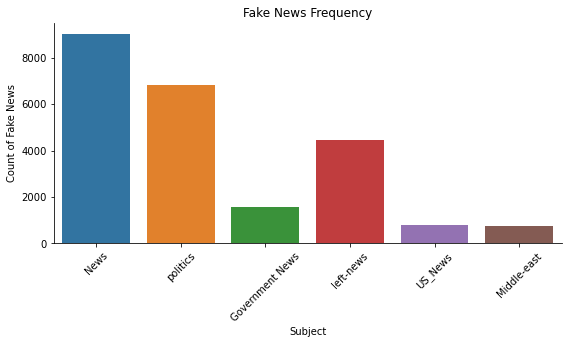

In [83]:
# Fake News are present in every subject of the news 
g = sns.catplot(x="subject", col="class",
                data=df_fake, kind="count",
                height=4, aspect=2)

g.set(xlabel='Subject', ylabel='Count of Fake News',title='Fake News Frequency')
g.set_xticklabels(rotation=45)

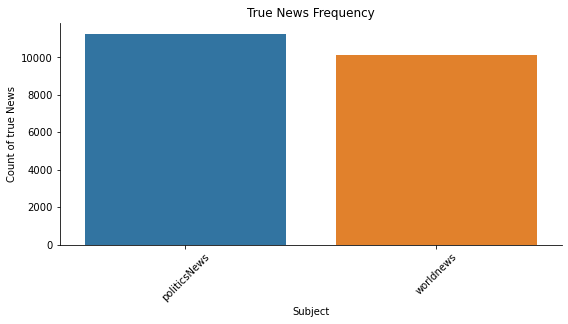

In [84]:
# True News are present in every subject of the news 
g = sns.catplot(x="subject", col="class",
                data=df_true, kind="count",
                height=4, aspect=2)

g.set(xlabel='Subject', ylabel='Count of true News',title='True News Frequency')
g.set_xticklabels(rotation=45)

In [9]:
# take 10 rows from each fake and real news for testing
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470,-1):
    df_fake.drop([i], axis = 0, inplace = True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

In [11]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\ALFURQ~1\AppData\Local\Temp/ipykernel_15472/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\ALFURQ~1\AppData\Local\Temp/ipykernel_15472/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [12]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [13]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [14]:
# save testing data into separate file
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

In [15]:
# merge both fake and real news into one file
df_marge = pd.concat([df_fake, df_true], axis =0 )
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [16]:
df_marge.tail(10)

,title,text,subject,date,class
21397,Germany's Schulz says he would demand U.S. wit...,BERLIN (Reuters) - The leader of Germany s Soc...,worldnews,"August 23, 2017",1
21398,Blunt instrument? What a list of banned articl...,SHANGHAI (Reuters) - An old review of an acade...,worldnews,"August 23, 2017",1
21399,Saudi police release teenager detained for dan...,DUBAI (Reuters) - A 14-year-old boy who was de...,worldnews,"August 22, 2017",1
21400,"The People's Princess, Britons work to keep me...",LONDON (Reuters) - Abdul Daoud spilt most of t...,worldnews,"August 23, 2017",1
21401,"Argentina labor unions protest job losses, Mac...",BUENOS AIRES (Reuters) - Argentina s main labo...,worldnews,"August 22, 2017",1
21402,Exclusive: Trump's Afghan decision may increas...,ON BOARD A U.S. MILITARY AIRCRAFT (Reuters) - ...,worldnews,"August 22, 2017",1
21403,U.S. puts more pressure on Pakistan to help wi...,WASHINGTON (Reuters) - The United States sugge...,worldnews,"August 21, 2017",1
21404,Exclusive: U.S. to withhold up to $290 million...,WASHINGTON (Reuters) - The United States has d...,worldnews,"August 22, 2017",1
21405,Trump talks tough on Pakistan's 'terrorist' ha...,ISLAMABAD (Reuters) - Outlining a new strategy...,worldnews,"August 22, 2017",1
21406,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1


In [17]:
df_marge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [19]:
# to check null values
df.isnull().sum()

text     0
class    0
dtype: int64

In [20]:
# to randomly shuffle the dataframe
df = df.sample(frac = 1)

In [21]:
df.head()

,text,class
8638,WASHINGTON (Reuters) - The chairman of the Hou...,1
15222,BEIRUT (Reuters) - Lebanon s foreign minister ...,1
6807,Hillary Clinton and Donald Trump emerged victo...,0
15536,"When it comes to limiting our free speech, not...",0
4877,Donald Trump s pathetic effort to reach out to...,0


In [22]:
# reset the index after shuffling
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [23]:
df.columns

Index(['text', 'class'], dtype='object')

In [24]:
df.head()

,text,class
0,WASHINGTON (Reuters) - The chairman of the Hou...,1
1,BEIRUT (Reuters) - Lebanon s foreign minister ...,1
2,Hillary Clinton and Donald Trump emerged victo...,0
3,"When it comes to limiting our free speech, not...",0
4,Donald Trump s pathetic effort to reach out to...,0


Text(0.5, 1.0, 'target variable count')

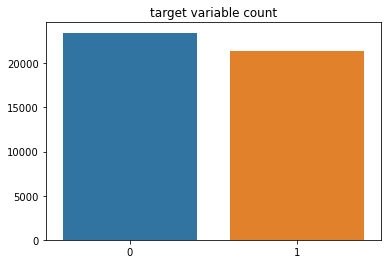

In [80]:
#Checking for count in the dataset
count = df['class'].value_counts().values
sns.barplot(x = [0, 1], y = count)
plt.title('target variable count')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

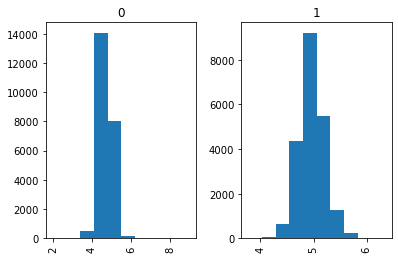

In [85]:
# The word distribution among the text of the news 
df['text'].str.split().apply(lambda x:[len(i) for i in x]).map(lambda x: np.mean(x)).hist(by=df['class'])

In [25]:
#Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [26]:
df["text"] = df["text"].apply(wordopt)

In [27]:
# Defining dependent and independent variable as x and y
x = df["text"]
y = df["class"]

In [ ]:
# Splitting the dataset into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [29]:
# Convert text to vectors
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# 1. Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [35]:
pred_lr=LR.predict(xv_test)

In [36]:
LR.score(xv_test, y_test)

0.9854723707664884

In [37]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5861
           1       0.98      0.99      0.98      5359

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [38]:
pred_lr

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [39]:
y_test

241      0
33660    1
39582    1
32795    1
29554    1
        ..
39615    0
11864    0
17256    0
38338    1
14232    0
Name: class, Length: 11220, dtype: int64

Text(69.0, 0.5, 'Truth')

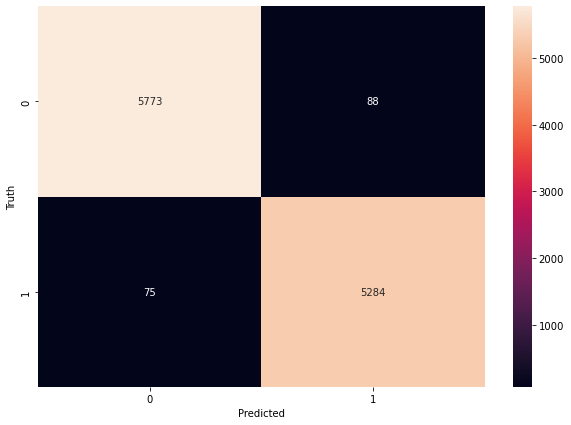

In [40]:
cm = confusion_matrix(y_test,pred_lr)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

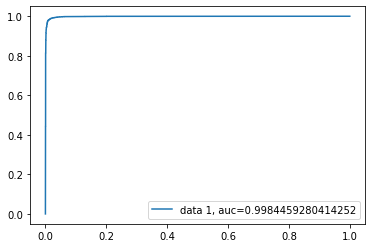

In [90]:
#ROC CURVE "logistic Regression"
from sklearn import metrics
y_pred_proba = LR.predict_proba(xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 2. Decision tree classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [49]:
pred_dt = DT.predict(xv_test)

In [50]:
DT.score(xv_test, y_test)

0.9959001782531194

In [51]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5861
           1       1.00      0.99      1.00      5359

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Text(69.0, 0.5, 'Truth')

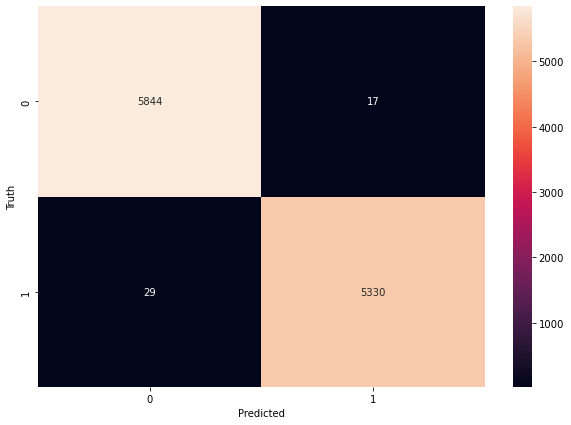

In [52]:
cm = confusion_matrix(y_test,pred_dt)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

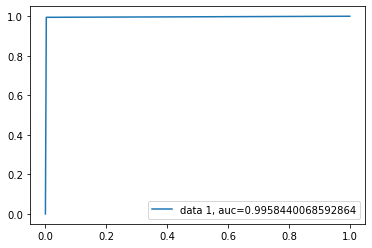

In [91]:
#ROC CURVE "Decision tree"
from sklearn import metrics
y_pred_proba = DT.predict_proba(xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 3. XG Boost classifier

In [53]:
from xgboost import XGBClassifier

In [54]:
XGB = XGBClassifier()
XGB.fit(xv_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [55]:
pred_XGB = XGB.predict(xv_test)

In [56]:
XGB.score(xv_test, y_test)

0.9978609625668449

In [57]:
print(classification_report(y_test, pred_XGB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5861
           1       1.00      1.00      1.00      5359

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Text(69.0, 0.5, 'Truth')

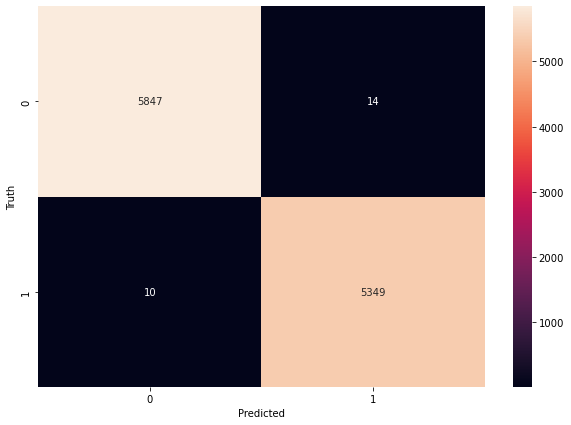

In [58]:
cm = confusion_matrix(y_test,pred_XGB)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

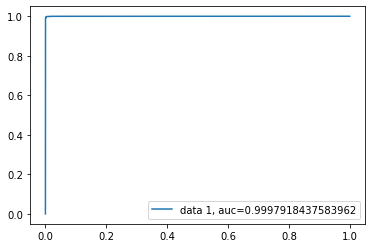

In [92]:
#ROC CURVE "XG Boost Classifier"
from sklearn import metrics
y_pred_proba = XGB.predict_proba(xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 4. Random Forest Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [61]:
pred_rfc = RFC.predict(xv_test)

In [62]:
RFC.score(xv_test, y_test)

0.9901960784313726

In [63]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5359

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Text(69.0, 0.5, 'Truth')

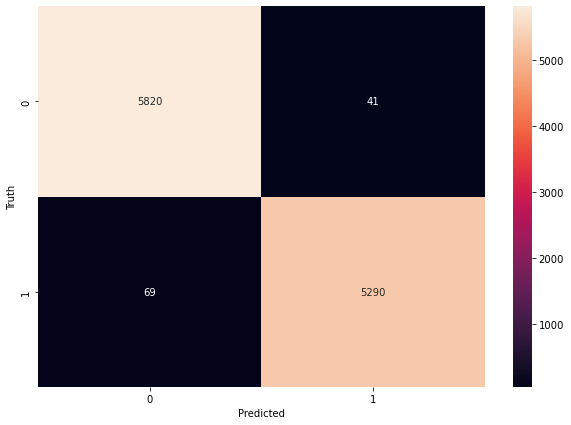

In [64]:
cm = confusion_matrix(y_test,pred_rfc)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

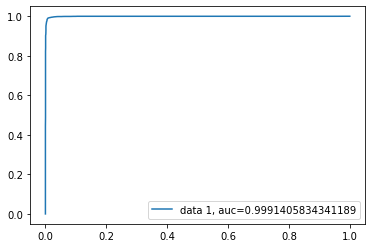

In [93]:
#ROC CURVE "Random Forest"
from sklearn import metrics
y_pred_proba = RFC.predict_proba(xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 5. Bernoulli Naive Bayes

In [65]:
from sklearn.naive_bayes import BernoulliNB

In [66]:
bnb = BernoulliNB()

In [67]:
bnb.fit(xv_train, y_train)

BernoulliNB()

In [68]:
pred_bnb = bnb.predict(xv_test)

In [69]:
bnb.score(xv_test, y_test)

0.9398395721925134

In [70]:
print(classification_report(y_test, pred_bnb))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5861
           1       0.92      0.96      0.94      5359

    accuracy                           0.94     11220
   macro avg       0.94      0.94      0.94     11220
weighted avg       0.94      0.94      0.94     11220



Text(69.0, 0.5, 'Truth')

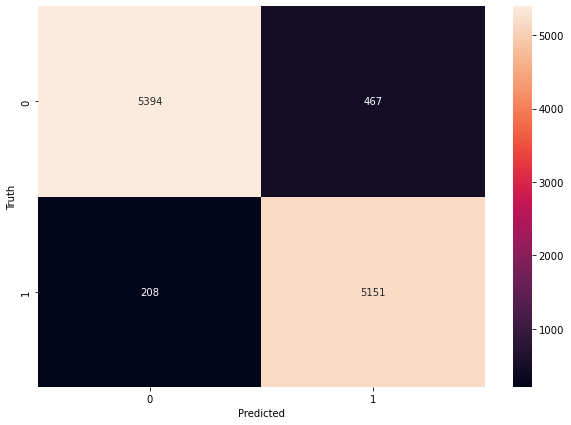

In [71]:
cm = confusion_matrix(y_test,pred_bnb)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

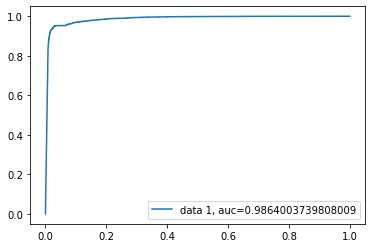

In [94]:
#ROC CURVE "Naive bayes"
from sklearn import metrics
y_pred_proba = bnb.predict_proba(xv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Model Testing

In [74]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_XGB = XGB.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_BNB = bnb.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_XGB[0]), 
                                                                                                              output_lable(pred_RFC[0]),
                                                                                                              output_lable(pred_BNB[0])))

In [75]:
news = str(input())
manual_testing(news)

BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they w

Conclusion: However based on accuracy and F1-value, the best model is XG Boost Classifier